# Attention for Helping Frame Prediction

In [1]:
from util import *
from util.parser import *
from util.img_kit import *
from util.notebook_display import *
from util.numeric_ops import *
from IPython import display
import numpy as np
from scipy import ndimage
from scipy import misc
from os import walk
import os
import tensorflow as tf
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['figure.figsize'] = (5.0, 5.0) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

## Box

imgs shape:     (14, 32, 32)
info:           {'images:': 'moving box uniform', 'dim': (14, 32, 32)}


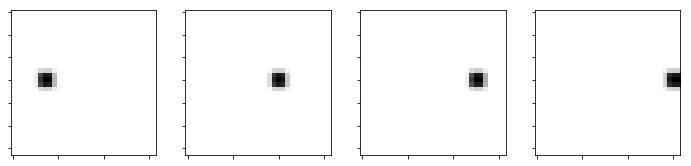

In [50]:
data_path = "data/moving-box/processed/single-uniform-32x32.npz"
data = np.load(data_path)
imgs, info = data['imgs'], data['info']
print("imgs shape:     {}".format(imgs.shape))
print("info:           {}".format(info))
num_train = imgs.shape[0]
sample_and_show_many(imgs, 4)

In [51]:
gap = 1
batch_size = 1
def sample_real():
    """
    return: (before, after), mid
    """
    before_indexes = np.random.choice(range(len(imgs) - gap - 1), batch_size, replace=False)
    after_indexes = before_indexes + gap + 1
    mid_indexes = (before_indexes + after_indexes)//2
    return (imgs[before_indexes], imgs[after_indexes]), imgs[mid_indexes]

In [52]:
(test_before, test_after), test_mid = sample_real()

In [53]:
def show_attention(img1, img2):
    attention = np.abs(img1-img2)
    plot_images([img1, img2, attention], sub_titles=["Before", "After", "Attentiobn"])

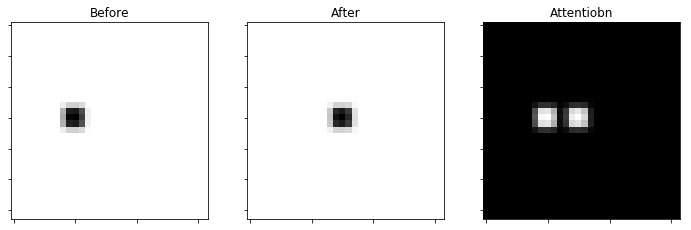

In [54]:
show_attention(test_before[0], test_after[0])

## Animation

imgs shape:     (89, 32, 48)
info:           {'images:': 'moving box uniform', 'dim': (89, 32, 48)}


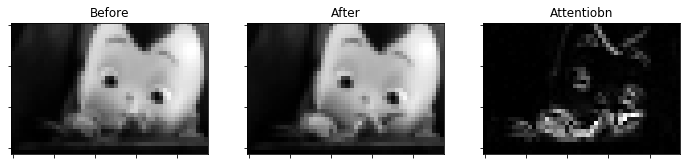

In [56]:
data_path = "data/Animation/kidPlaying-32x48.npz"
data = np.load(data_path)
imgs, info = data['imgs'], data['info']
print("imgs shape:     {}".format(imgs.shape))
print("info:           {}".format(info))
num_train = imgs.shape[0]
(test_before, test_after), test_mid = sample_real()
show_attention(test_before[0], test_after[0])

imgs shape:     (42, 64, 128)
info:           {'images:': 'moving box uniform', 'dim': (42, 64, 128)}


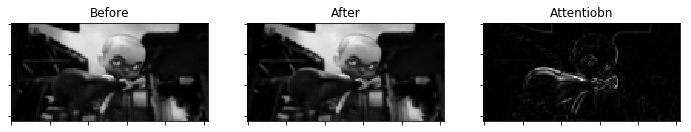

In [59]:
data_path = "data/Animation/kidSwing-64x128.npz"
data = np.load(data_path)
imgs, info = data['imgs'], data['info']
print("imgs shape:     {}".format(imgs.shape))
print("info:           {}".format(info))
num_train = imgs.shape[0]
(test_before, test_after), test_mid = sample_real()
show_attention(test_before[0], test_after[0])